In [1]:
import sys
sys.path.append('..')

from utils.misc import *
from utils.classifier import *
from utils.visualiser import *

## Loading pre-processed data

In [2]:
# train
df_train = pd.read_csv("../data/train/df_train.csv", index_col=0)

df_train_b0 = pd.read_csv("../data/train/df_train_b0.csv", index_col=0)
df_train_b1 = pd.read_csv("../data/train/df_train_b1.csv", index_col=0)
df_train_b2 = pd.read_csv("../data/train/df_train_b2.csv", index_col=0)

df_train_b0_f0 = pd.read_csv("../data/train/df_train_b0_f0.csv", index_col=0)
df_train_b0_f1 = pd.read_csv("../data/train/df_train_b0_f1.csv", index_col=0)
df_train_b0_f2 = pd.read_csv("../data/train/df_train_b0_f2.csv", index_col=0)
df_train_b0_f3 = pd.read_csv("../data/train/df_train_b0_f3.csv", index_col=0)

df_train_b1_f0 = pd.read_csv("../data/train/df_train_b1_f0.csv", index_col=0)
df_train_b1_f1 = pd.read_csv("../data/train/df_train_b1_f1.csv", index_col=0)
df_train_b1_f2 = pd.read_csv("../data/train/df_train_b1_f2.csv", index_col=0)
df_train_b1_f3 = pd.read_csv("../data/train/df_train_b1_f3.csv", index_col=0)

df_train_b2_f0 = pd.read_csv("../data/train/df_train_b2_f0.csv", index_col=0)
df_train_b2_f1 = pd.read_csv("../data/train/df_train_b2_f1.csv", index_col=0)
df_train_b2_f2 = pd.read_csv("../data/train/df_train_b2_f2.csv", index_col=0)
df_train_b2_f3 = pd.read_csv("../data/train/df_train_b2_f3.csv", index_col=0)
df_train_b2_f4 = pd.read_csv("../data/train/df_train_b2_f4.csv", index_col=0)

df_train_wap = np.load("../data/train/df_train_wap.npy", allow_pickle=True)

df_train_b0_wap = np.load("../data/train/df_train_b0_wap.npy", allow_pickle=True)
df_train_b1_wap = np.load("../data/train/df_train_b1_wap.npy", allow_pickle=True)
df_train_b2_wap = np.load("../data/train/df_train_b2_wap.npy", allow_pickle=True)

df_train_b0_f0_wap = np.load("../data/train/df_train_b0_f0_wap.npy", allow_pickle=True)
df_train_b0_f1_wap = np.load("../data/train/df_train_b0_f1_wap.npy", allow_pickle=True)
df_train_b0_f2_wap = np.load("../data/train/df_train_b0_f2_wap.npy", allow_pickle=True)
df_train_b0_f3_wap = np.load("../data/train/df_train_b0_f3_wap.npy", allow_pickle=True)

df_train_b1_f0_wap = np.load("../data/train/df_train_b1_f0_wap.npy", allow_pickle=True)
df_train_b1_f1_wap = np.load("../data/train/df_train_b1_f1_wap.npy", allow_pickle=True)
df_train_b1_f2_wap = np.load("../data/train/df_train_b1_f2_wap.npy", allow_pickle=True)
df_train_b1_f3_wap = np.load("../data/train/df_train_b1_f3_wap.npy", allow_pickle=True)

df_train_b2_f0_wap = np.load("../data/train/df_train_b2_f0_wap.npy", allow_pickle=True)
df_train_b2_f1_wap = np.load("../data/train/df_train_b2_f1_wap.npy", allow_pickle=True)
df_train_b2_f2_wap = np.load("../data/train/df_train_b2_f2_wap.npy", allow_pickle=True)
df_train_b2_f3_wap = np.load("../data/train/df_train_b2_f3_wap.npy", allow_pickle=True)
df_train_b2_f4_wap = np.load("../data/train/df_train_b2_f4_wap.npy", allow_pickle=True)

## Grouping rooms into clusters

In [ ]:
"""
clusters_b0 = kmeans_clustering(df_train_b0_wap, 20, verbose=False)
clusters_b1 = kmeans_clustering(df_train_b1_wap, 20, verbose=False)
clusters_b2 = kmeans_clustering(df_train_b2_wap, 20, verbose=False)

np.save('../results/clusters_b0.npy', clusters_b0)
np.save('../results/clusters_b1.npy', clusters_b1)
np.save('../results/clusters_b2.npy', clusters_b2)
"""

In [3]:
clusters_b0 = np.load("../results/clusters_b0.npy", allow_pickle=True).item()
clusters_b1 = np.load("../results/clusters_b1.npy", allow_pickle=True).item()
clusters_b2 = np.load("../results/clusters_b2.npy", allow_pickle=True).item()

### Evaluating clustering results

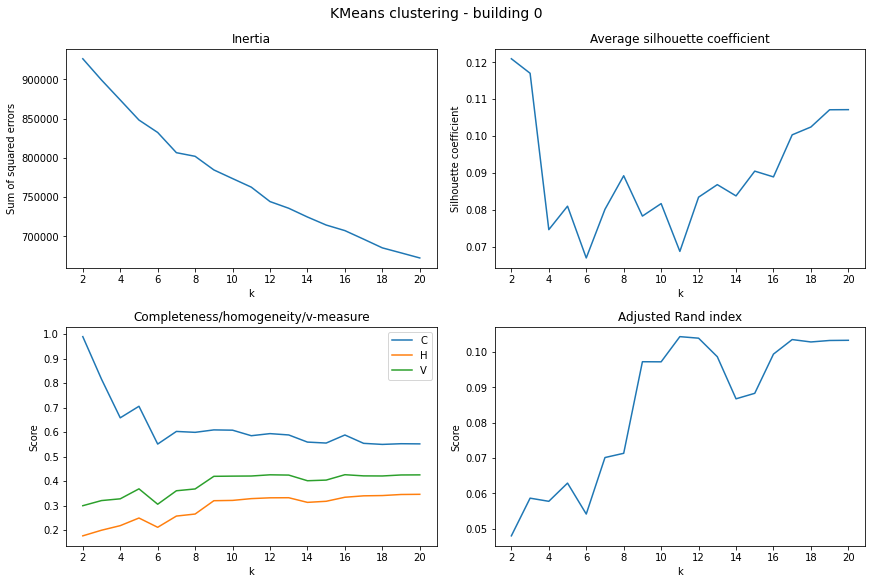

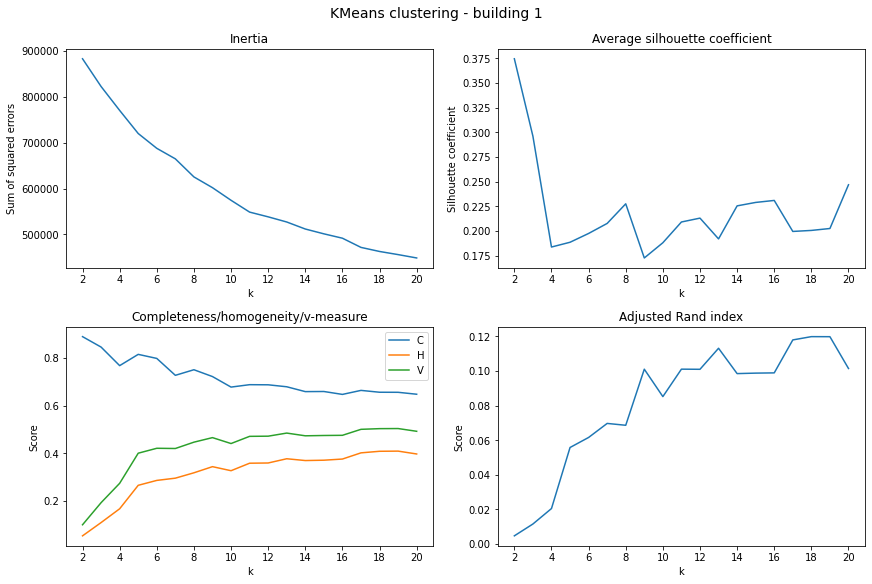

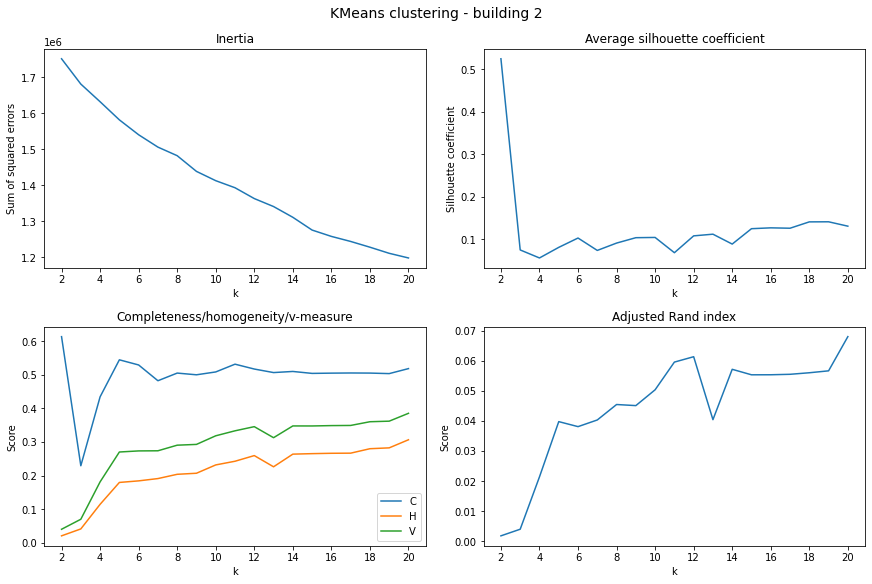

In [4]:
kmeans_evaluation(df_train_b0, clusters_b0, 'building 0', False)
kmeans_evaluation(df_train_b1, clusters_b1, 'building 1', False)
kmeans_evaluation(df_train_b2, clusters_b2, 'building 2', False)

## Finding the best k

In [5]:
def compare_cluster_accuracy(k, results):
    scores = results.copy()
    scores.fillna(str(0), inplace=True)
    for col in scores.columns:
        scores[col] = scores[col].apply(lambda x: x[0])
    scores.replace(str(0), np.nan, inplace=True)
        
    df = pd.DataFrame({
        'K' + str(k): scores.mean(axis=1)
    })
    return df

### Building 0

In [ ]:
kwargs = {
    'data'        : df_train_b0,
    'clusters'    : clusters_b0,
    'classifier'  :'knn',
    'cv'          : 10
}

k2_sample_count, k8_room_count, k2_acc = classification_room_in_cluster(k=2, **kwargs)
k4_sample_count, k8_room_count, k4_acc = classification_room_in_cluster(k=4, **kwargs)
k6_sample_count, k8_room_count, k6_acc = classification_room_in_cluster(k=6, **kwargs)
k8_sample_count, k8_room_count, k8_acc = classification_room_in_cluster(k=8, **kwargs)
k10_sample_count, k10_room_count, k10_acc = classification_room_in_cluster(k=10, **kwargs)
k12_sample_count, k12_room_count, k12_acc = classification_room_in_cluster(k=12, **kwargs)

In [ ]:
kwargs = {
    'data'        : df_train_b0,
    'clusters'    : clusters_b0,
    'classifier'  :'lr',
    'cv'          : 10
}

k2_sample_count, k8_room_count, k2_acc = classification_room_in_cluster(k=2, **kwargs)
k4_sample_count, k8_room_count, k4_acc = classification_room_in_cluster(k=4, **kwargs)
k6_sample_count, k8_room_count, k6_acc = classification_room_in_cluster(k=6, **kwargs)
k8_sample_count, k8_room_count, k8_acc = classification_room_in_cluster(k=8, **kwargs)
k10_sample_count, k10_room_count, k10_acc = classification_room_in_cluster(k=10, **kwargs)
k12_sample_count, k12_room_count, k12_acc = classification_room_in_cluster(k=12, **kwargs)

In [6]:
kwargs = {
    'data'        : df_train_b0,
    'clusters'    : clusters_b0,
    'classifier'  :'svm',
    'cv'          : 10
}

k2_sample_count, k8_room_count, k2_acc = classification_room_in_cluster(k=2, **kwargs)
k4_sample_count, k8_room_count, k4_acc = classification_room_in_cluster(k=4, **kwargs)
k6_sample_count, k8_room_count, k6_acc = classification_room_in_cluster(k=6, **kwargs)
k8_sample_count, k8_room_count, k8_acc = classification_room_in_cluster(k=8, **kwargs)
k10_sample_count, k10_room_count, k10_acc = classification_room_in_cluster(k=10, **kwargs)
k12_sample_count, k12_room_count, k12_acc = classification_room_in_cluster(k=12, **kwargs)

Floor [1] - Cluster [0]: No enough samples to be split.
Floor [0] - Cluster [2]: No enough samples to be split.
Floor [0] - Cluster [0]: No enough samples to be split.
Floor [0] - Cluster [1]: No enough samples to be split.
Floor [2] - Cluster [5]: No enough samples to be split.
Floor [0] - Cluster [7]: No enough samples to be split.
Floor [0] - Cluster [2]: No enough samples to be split.
Floor [0] - Cluster [3]: No enough samples to be split.
Floor [1] - Cluster [2]: No enough samples to be split.
Floor [2] - Cluster [4]: No enough samples to be split.
Floor [2] - Cluster [1]: No enough samples to be split.
Floor [1] - Cluster [1]: No enough samples to be split.
Floor [1] - Cluster [2]: No enough samples to be split.
Floor [1] - Cluster [5]: No enough samples to be split.
Floor [2] - Cluster [6]: No enough samples to be split.
Floor [3] - Cluster [9]: No enough samples to be split.
Floor [0] - Cluster [0]: No enough samples to be split.
Floor [0] - Cluster [8]: No enough samples to be

In [7]:
b0_mean = pd.concat([
    compare_cluster_accuracy(2, k2_acc),
    compare_cluster_accuracy(4, k2_acc),
    compare_cluster_accuracy(6, k2_acc),
    compare_cluster_accuracy(8, k2_acc),
    compare_cluster_accuracy(10, k10_acc),
    compare_cluster_accuracy(12, k12_acc),
], axis=1)

b0_mean

,K2,K4,K6,K8,K10,K12
f0,0.741093,0.741093,0.741093,0.741093,0.828182,0.782178
f1,0.746999,0.746999,0.746999,0.746999,0.807029,0.822267
f2,0.693157,0.693157,0.693157,0.693157,0.728178,0.734051
f3,0.672416,0.672416,0.672416,0.672416,0.722043,0.729572


In [8]:
print((b0_mean * 100).to_latex(float_format="%.2f%%"))

\begin{tabular}{lrrrrrr}
\toprule
{} &     K2 &     K4 &     K6 &     K8 &    K10 &    K12 \\
\midrule
f0 & 74.11\% & 74.11\% & 74.11\% & 74.11\% & 82.82\% & 78.22\% \\
f1 & 74.70\% & 74.70\% & 74.70\% & 74.70\% & 80.70\% & 82.23\% \\
f2 & 69.32\% & 69.32\% & 69.32\% & 69.32\% & 72.82\% & 73.41\% \\
f3 & 67.24\% & 67.24\% & 67.24\% & 67.24\% & 72.20\% & 72.96\% \\
\bottomrule
\end{tabular}



### Building 1

In [ ]:
kwargs = {
    'data'        : df_train_b1,
    'clusters'    : clusters_b1,
    'classifier'  :'knn',
    'cv'          : 10
}

k2_sample_count, k8_room_count, k2_acc = classification_room_in_cluster(k=2, **kwargs)
k4_sample_count, k8_room_count, k4_acc = classification_room_in_cluster(k=4, **kwargs)
k6_sample_count, k8_room_count, k6_acc = classification_room_in_cluster(k=6, **kwargs)
k8_sample_count, k8_room_count, k8_acc = classification_room_in_cluster(k=8, **kwargs)
k10_sample_count, k10_room_count, k10_acc = classification_room_in_cluster(k=10, **kwargs)
k12_sample_count, k12_room_count, k12_acc = classification_room_in_cluster(k=12, **kwargs)

In [ ]:
kwargs = {
    'data'        : df_train_b1,
    'clusters'    : clusters_b1,
    'classifier'  :'lr',
    'cv'          : 10
}

k2_sample_count, k8_room_count, k2_acc = classification_room_in_cluster(k=2, **kwargs)
k4_sample_count, k8_room_count, k4_acc = classification_room_in_cluster(k=4, **kwargs)
k6_sample_count, k8_room_count, k6_acc = classification_room_in_cluster(k=6, **kwargs)
k8_sample_count, k8_room_count, k8_acc = classification_room_in_cluster(k=8, **kwargs)
k10_sample_count, k10_room_count, k10_acc = classification_room_in_cluster(k=10, **kwargs)
k12_sample_count, k12_room_count, k12_acc = classification_room_in_cluster(k=12, **kwargs)

In [10]:
kwargs = {
    'data'        : df_train_b1,
    'clusters'    : clusters_b1,
    'classifier'  :'svm',
    'cv'          : 10
}

k2_sample_count, k8_room_count, k2_acc = classification_room_in_cluster(k=2, **kwargs)
k4_sample_count, k8_room_count, k4_acc = classification_room_in_cluster(k=4, **kwargs)
k6_sample_count, k8_room_count, k6_acc = classification_room_in_cluster(k=6, **kwargs)
k8_sample_count, k8_room_count, k8_acc = classification_room_in_cluster(k=8, **kwargs)
k10_sample_count, k10_room_count, k10_acc = classification_room_in_cluster(k=10, **kwargs)
k12_sample_count, k12_room_count, k12_acc = classification_room_in_cluster(k=12, **kwargs)

Floor [0] - Cluster [1]: No enough samples to be split.
Floor [1] - Cluster [3]: No enough samples to be split.
Floor [1] - Cluster [2]: No enough samples to be split.
Floor [1] - Cluster [0]: No enough samples to be split.
Floor [1] - Cluster [1]: No enough samples to be split.
Floor [2] - Cluster [4]: No enough samples to be split.
Floor [1] - Cluster [3]: No enough samples to be split.
Floor [2] - Cluster [2]: No enough samples to be split.
Floor [2] - Cluster [0]: No enough samples to be split.
Floor [0] - Cluster [2]: No enough samples to be split.
Floor [1] - Cluster [7]: No enough samples to be split.
Floor [1] - Cluster [3]: No enough samples to be split.
Floor [2] - Cluster [1]: No enough samples to be split.
Floor [3] - Cluster [11]: No enough samples to be split.


In [11]:
b1_mean = pd.concat([
    compare_cluster_accuracy(2, k2_acc),
    compare_cluster_accuracy(4, k2_acc),
    compare_cluster_accuracy(6, k2_acc),
    compare_cluster_accuracy(8, k2_acc),
    compare_cluster_accuracy(10, k10_acc),
    compare_cluster_accuracy(12, k12_acc),
], axis=1)

b1_mean

,K2,K4,K6,K8,K10,K12
f0,0.811902,0.811902,0.811902,0.811902,0.846852,0.834329
f1,0.778795,0.778795,0.778795,0.778795,0.754776,0.732673
f2,0.891707,0.891707,0.891707,0.891707,0.915135,0.904314
f3,0.775387,0.775387,0.775387,0.775387,0.824601,0.832640


In [12]:
print((b1_mean * 100).to_latex(float_format="%.2f%%"))

\begin{tabular}{lrrrrrr}
\toprule
{} &     K2 &     K4 &     K6 &     K8 &    K10 &    K12 \\
\midrule
f0 & 81.19\% & 81.19\% & 81.19\% & 81.19\% & 84.69\% & 83.43\% \\
f1 & 77.88\% & 77.88\% & 77.88\% & 77.88\% & 75.48\% & 73.27\% \\
f2 & 89.17\% & 89.17\% & 89.17\% & 89.17\% & 91.51\% & 90.43\% \\
f3 & 77.54\% & 77.54\% & 77.54\% & 77.54\% & 82.46\% & 83.26\% \\
\bottomrule
\end{tabular}



### Building 2

In [ ]:
kwargs = {
    'data'        : df_train_b2,
    'clusters'    : clusters_b2,
    'classifier'  :'knn',
    'cv'          : 10
}

k2_sample_count, k8_room_count, k2_acc = classification_room_in_cluster(k=2, **kwargs)
k4_sample_count, k8_room_count, k4_acc = classification_room_in_cluster(k=4, **kwargs)
k6_sample_count, k8_room_count, k6_acc = classification_room_in_cluster(k=6, **kwargs)
k8_sample_count, k8_room_count, k8_acc = classification_room_in_cluster(k=8, **kwargs)
k10_sample_count, k10_room_count, k10_acc = classification_room_in_cluster(k=10, **kwargs)
k12_sample_count, k12_room_count, k12_acc = classification_room_in_cluster(k=12, **kwargs)

In [ ]:
kwargs = {
    'data'        : df_train_b2,
    'clusters'    : clusters_b2,
    'classifier'  :'lr',
    'cv'          : 10
}

k2_sample_count, k8_room_count, k2_acc = classification_room_in_cluster(k=2, **kwargs)
k4_sample_count, k8_room_count, k4_acc = classification_room_in_cluster(k=4, **kwargs)
k6_sample_count, k8_room_count, k6_acc = classification_room_in_cluster(k=6, **kwargs)
k8_sample_count, k8_room_count, k8_acc = classification_room_in_cluster(k=8, **kwargs)
k10_sample_count, k10_room_count, k10_acc = classification_room_in_cluster(k=10, **kwargs)
k12_sample_count, k12_room_count, k12_acc = classification_room_in_cluster(k=12, **kwargs)

In [13]:
kwargs = {
    'data'        : df_train_b2,
    'clusters'    : clusters_b2,
    'classifier'  :'svm',
    'cv'          : 10
}

k2_sample_count, k8_room_count, k2_acc = classification_room_in_cluster(k=2, **kwargs)
k4_sample_count, k8_room_count, k4_acc = classification_room_in_cluster(k=4, **kwargs)
k6_sample_count, k8_room_count, k6_acc = classification_room_in_cluster(k=6, **kwargs)
k8_sample_count, k8_room_count, k8_acc = classification_room_in_cluster(k=8, **kwargs)
k10_sample_count, k10_room_count, k10_acc = classification_room_in_cluster(k=10, **kwargs)
k12_sample_count, k12_room_count, k12_acc = classification_room_in_cluster(k=12, **kwargs)

Floor [2] - Cluster [1]: No enough samples to be split.
Floor [2] - Cluster [3]: No enough samples to be split.
Floor [2] - Cluster [1]: No enough samples to be split.
Floor [3] - Cluster [3]: No enough samples to be split.
Floor [0] - Cluster [1]: No enough samples to be split.
Floor [1] - Cluster [2]: No enough samples to be split.
Floor [2] - Cluster [4]: No enough samples to be split.
Floor [4] - Cluster [3]: No enough samples to be split.
Floor [0] - Cluster [3]: No enough samples to be split.
Floor [1] - Cluster [2]: No enough samples to be split.
Floor [1] - Cluster [6]: No enough samples to be split.
Floor [2] - Cluster [4]: No enough samples to be split.
Floor [2] - Cluster [7]: No enough samples to be split.
Floor [3] - Cluster [7]: No enough samples to be split.
Floor [4] - Cluster [4]: No enough samples to be split.
Floor [0] - Cluster [8]: No enough samples to be split.
Floor [1] - Cluster [4]: No enough samples to be split.
Floor [1] - Cluster [2]: No enough samples to be

In [14]:
b2_mean = pd.concat([
    compare_cluster_accuracy(2, k2_acc),
    compare_cluster_accuracy(4, k2_acc),
    compare_cluster_accuracy(6, k2_acc),
    compare_cluster_accuracy(8, k2_acc),
    compare_cluster_accuracy(10, k10_acc),
    compare_cluster_accuracy(12, k12_acc),
], axis=1)

b2_mean

,K2,K4,K6,K8,K10,K12
f0,0.878832,0.878832,0.878832,0.878832,0.880338,0.867897
f1,0.859470,0.859470,0.859470,0.859470,0.853485,0.792224
f2,0.844642,0.844642,0.844642,0.844642,0.868354,0.885058
f3,0.833744,0.833744,0.833744,0.833744,0.832628,0.810578
f4,0.740847,0.740847,0.740847,0.740847,0.646030,0.646797


In [15]:
print((b2_mean * 100).to_latex(float_format="%.2f%%"))

\begin{tabular}{lrrrrrr}
\toprule
{} &     K2 &     K4 &     K6 &     K8 &    K10 &    K12 \\
\midrule
f0 & 87.88\% & 87.88\% & 87.88\% & 87.88\% & 88.03\% & 86.79\% \\
f1 & 85.95\% & 85.95\% & 85.95\% & 85.95\% & 85.35\% & 79.22\% \\
f2 & 84.46\% & 84.46\% & 84.46\% & 84.46\% & 86.84\% & 88.51\% \\
f3 & 83.37\% & 83.37\% & 83.37\% & 83.37\% & 83.26\% & 81.06\% \\
f4 & 74.08\% & 74.08\% & 74.08\% & 74.08\% & 64.60\% & 64.68\% \\
\bottomrule
\end{tabular}

